In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, StratifiedKFold
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from dtaidistance import dtw
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#load training, test windows here, they're saved for complexity reasons, run code from here
with open('saved_training_lists.pkl', 'rb') as f:
    training_lists = pickle.load(f)

with open('saved_testing_lists.pkl', 'rb') as f:
    testing_lists = pickle.load(f)

In [3]:
testing_size=500
ns=5
kfold = TimeSeriesSplit(n_splits = ns, test_size = testing_size)

In [4]:
model = RandomForestClassifier(
    n_estimators = 100, # number of trees in ensemble
    max_depth = 10, # max_depth of each tree
    min_samples_leaf = 5, 
    max_features = 5, # default is round(sqrt(num_features)), which in this case is 1.
    random_state = 121 # for consistency
    )
accuracies_rfc = {}
for window in training_lists.keys():
    training_list = training_lists[window]
    testing_list = testing_lists[window]
    a=0 
    for i in range(ns):
        model.fit(X=training_list[i][0],y=training_list[i][1])
        a+= accuracy_score(model.predict(testing_list[i][0]),testing_list[i][1])
    a=a/ns
    accuracies_rfc[window] = a

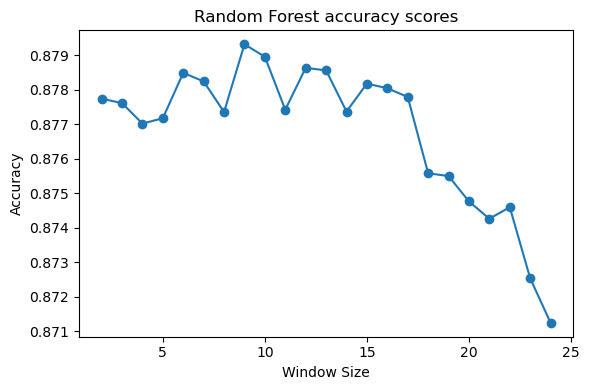

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(list(accuracies_rfc.keys()), list(accuracies_rfc.values()), marker='o')
plt.title("Random Forest accuracy scores")
plt.xlabel("Window Size")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

### End